# Audio

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 1

Для начала познакомимся с этими записями. \
Установи библиотеку [librosa](https://librosa.org/). Это популярная библиотека для работы с аудио.
Визуализируй аудио сигнал файла `0_1_0_1_1_1_0_0.wav` с помощью функции [librosa.display.waveshow](https://librosa.org/doc/main/generated/librosa.display.waveshow.html)
График должен быть такой же, как показано ниже (по значениям):

![waveform](../misc/images/waveform.png)
>Для того, чтобы прослушать это аудио файл, можешь воспользоваться [IPython.display.Audio](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio)

In [ ]:
pip install librosa

In [4]:
# НЕ ЗАПУСКАТЬ
import zipfile
from zipfile import ZipFile

with zipfile.ZipFile('/content/drive/MyDrive/school21/day09/datasets/audio_yes_no.zip', 'r') as zip_file:
    zip_file.extractall('/content/drive/MyDrive/school21/day09/datasets/')

In [5]:
import librosa
import os # библиотека для работы с файлами
directory = '/content/drive/MyDrive/school21/day09/datasets/waves_yesno 2/' #задаем директорию с данными
file = directory+'/0_1_0_1_1_1_0_0.wav'
signal, sr = librosa.load(file) # загружаем файл

In [6]:
d=len(signal)

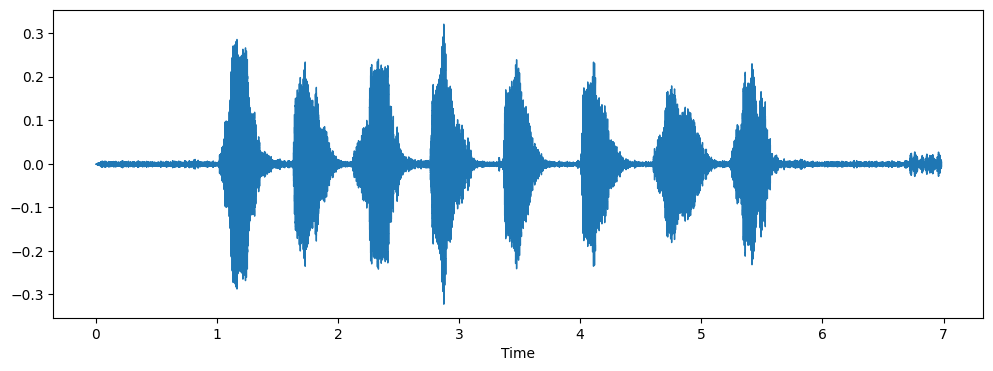

In [7]:
import matplotlib.pyplot as plt
import librosa.display as ld
plt.figure(figsize=(12,4))
ld.waveshow(signal)

In [ ]:
import IPython
display(IPython.display.Audio(signal, rate = sr))

## Task 2

Для классификации обычно использует не просто аудио сигнал, а его частотно-временное представление. Для этого сигнал требуется
преобразовать с помощью [оконного преобразования Фурье](https://clck.ru/34JnZD).
С помощью функции [librosa.display.specshow](https://librosa.org/doc/main/generated/librosa.display.specshow.html)
выведи спектрограмму сигнала. \
График должен быть такой же, как показано ниже (по значениям):
![sftp](../misc/images/sftp.png)

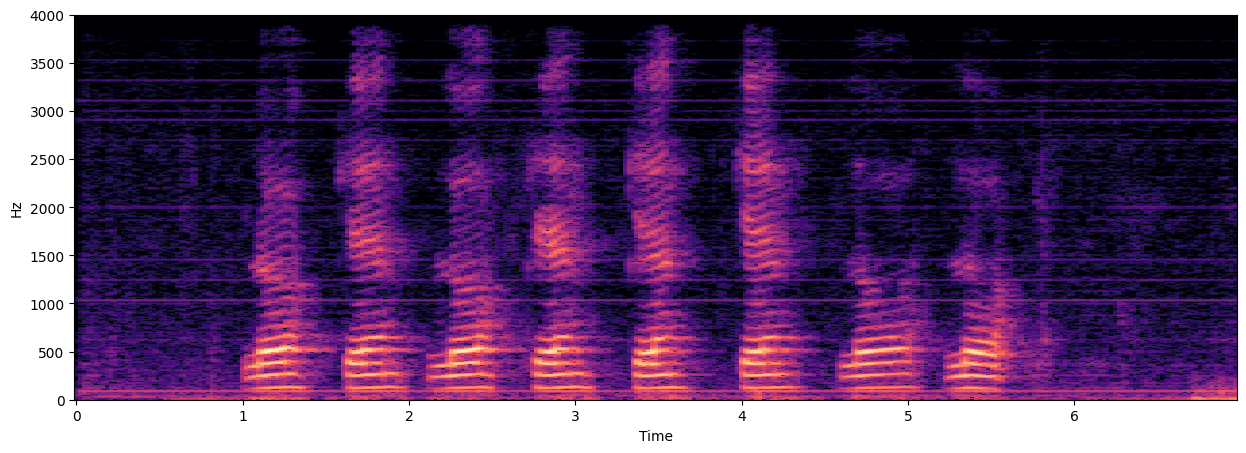

In [8]:
plt.figure(figsize=(15, 5))
stft = librosa.stft(signal)# Оконное преобразование
s = librosa.amplitude_to_db(abs(stft))# Преобразуем амплитуду STFT в децибелы и получаем амплитуду в форме dB
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.ylim([0, 4000])
plt.show()

## Task 3

C помощью функции [load_dataset](code-samples/audio_utils.py) загрузи датасет. \
Раздели его на train и test c параметрами `test_size=0.2`, `random_state=42`. \
Выведи количество файлов в train и test частях.

In [9]:
def load_dataset(directory: str):
    sr = None
    X, labels, files = [], [], []
    for f in glob(directory + "/*.wav"):
        filename = os.path.basename(f)
        name = filename[:-4]
        y = [int(label) for label in name.split("_")]
        x, sr = librosa.load(f)
        X.append(x)
        labels.append(y)
        files.append(filename)

    return X, labels, sr, files

X - Список аудио сигналов
        labels - Список меток (Например для файла '0_0_0_1_0_1_1_0.wav': [0, 0, 0, 1, 0, 1, 1, 0])
        sr - частоты дискретизаций аудио файлов
        files - Названия файлов


In [10]:
import os
from glob import glob
import pandas as pd

X, labels, sr, files = load_dataset(directory=directory)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.2, random_state=42 )
len(X_test), len(X_train)
print("Количество файлов в тренировочном наборе: ", len(X_train))
print("Количество файлов в тестовом наборе: ", len(X_test))

Количество файлов в тренировочном наборе:  47
Количество файлов в тестовом наборе:  12


## Task 4

Наши аудио записи содержат как речь человека, так и молчание. Для каждой записи нам нужно определить сегменты записи,
где человек молчит, а где произносит слова. \
Эта задача называется [Voice Activity Detection (VAD)](https://ru.wikipedia.org/wiki/Voice_Activity_Detection).
Придумайте или найдите метод, по которому можно распознавать участки с речью на аудио записи.

Например:
Запись '0_0_0_1_0_1_1_0.wav' содержит 137592 отсчетов. Сегменты с речью для этой записи (Отмечены красным):
[[23996, 32539],
 [35410, 44925],
 [49493, 57410],
 [60458, 68635],
 [73308, 81278],
 [84001, 91942],
 [97381, 104166],
 [109018, 115573]]
![sftp](../misc/images/vad.png)

Выведи несколько примеров работы твоего VAD-алгоритма, по аналогии с примером, для других аудио записей. Попробуй добиться
наилучшего качества нахождения речи.

In [12]:
import os
import librosa
import pandas as pd
import seaborn as sns
import numpy as np

<Axes: >

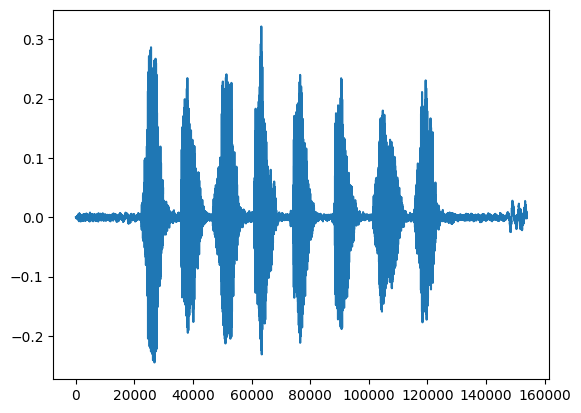

In [13]:
directory = '/content/drive/MyDrive/school21/day09/datasets/waves_yesno 2/' #задаем директорию с данными
file_name = directory+'/0_1_0_1_1_1_0_0.wav'
y, sr = librosa.load(file_name)
sns.lineplot((y))

In [24]:
limit = 0.03
y0 = np.select([abs(y) > limit], [1])
df = pd.DataFrame({
    'sign_orig': y,
    'sign_abs': abs(y),
    'sign_limit': y0
})
# Создаем столбец 'time' значение времени в каждый момент.
df['time'] = df.index / sr
#  моменты, когда присутствует речь
df['sign_limit'] = df['sign_limit'].replace(0, np.nan)

<Axes: xlabel='time', ylabel='sign_abs'>

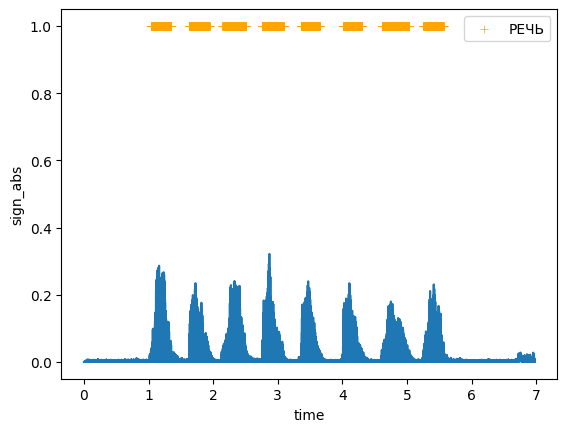

In [25]:
sns.lineplot(data=df, x='time', y='sign_abs')
sns.scatterplot(data=df, x='time', y='sign_limit', label='РЕЧЬ', marker='+', color='orange')

<Axes: >

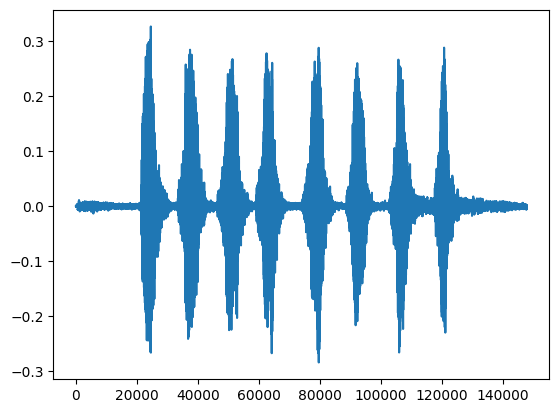

In [26]:
directory = '/content/drive/MyDrive/school21/day09/datasets/waves_yesno 2/' #задаем директорию с данными
file_name = directory+'/1_0_0_0_0_0_0_0.wav'
y, sr = librosa.load(file_name)
sns.lineplot((y))

<Axes: xlabel='time', ylabel='sign_abs'>

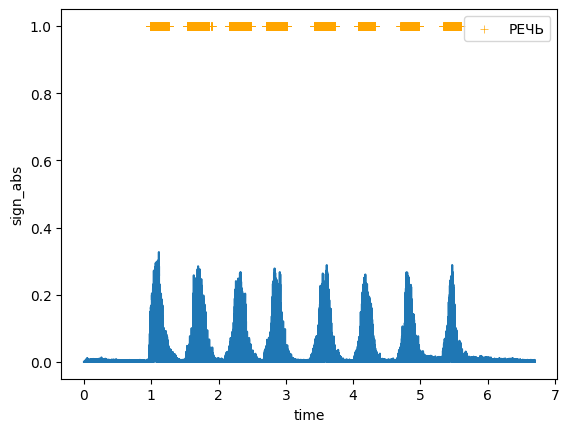

In [27]:
limit = 0.04
y0 = np.select([abs(y)>limit ],[1])
df = pd.DataFrame({
    'sign_orig': y,
    'sign_abs': abs(y),
    'sign_limit': y0})
df['time'] = df.index / sr
df['sign_limit'] = df['sign_limit'].replace(0, np.nan)
sns.lineplot(data=df, x='time', y='sign_abs')
sns.scatterplot(data=df, x='time', y='sign_limit', label='РЕЧЬ', marker='+', color='orange')

<Axes: >

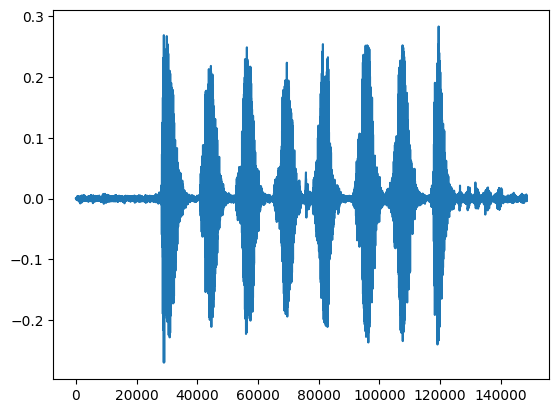

In [29]:
directory = '/content/drive/MyDrive/school21/day09/datasets/waves_yesno 2/' #задаем директорию с данными
file_name = directory+'/1_0_0_0_0_0_0_1.wav'
y, sr = librosa.load(file_name)
sns.lineplot((y))


<Axes: xlabel='time', ylabel='sign_abs'>

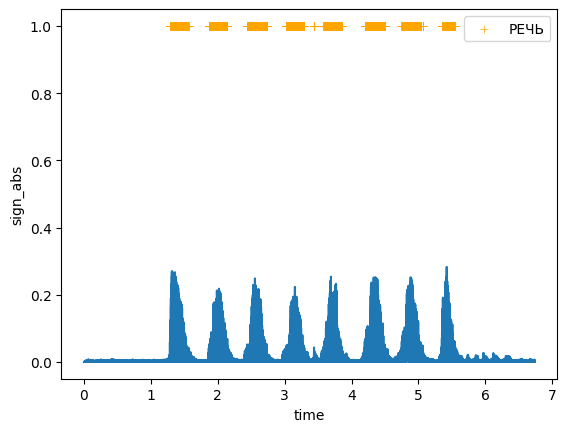

In [30]:
limit = 0.04
y0 = np.select([abs(y)>limit ],[1])
df = pd.DataFrame({
    'sign_orig': y,
    'sign_abs': abs(y),
    'sign_limit': y0})
df['time'] = df.index / sr
df['sign_limit'] = df['sign_limit'].replace(0, np.nan)
sns.lineplot(data=df, x='time', y='sign_abs')
sns.scatterplot(data=df, x='time', y='sign_limit', label='РЕЧЬ', marker='+', color='orange')

## Task 5

После того как мы узнали сегменты аудио с речью, то можно перейти к самой задаче классификации. \
Внимательно изучи функцию [make_dataset](code-samples/audio_utils.py). С помощью этой функции cгенерируй X, Y для train и test выборок.
Затем попробуй обучить различные классификаторы. Например, SVM или LogisticRegression.
Измерь точность (accuracy) классификации на тестовой выборке.

In [31]:
def make_dataset(samples, labels, vad_segments):
    """

    :param samples: Список аудио сигналов
    :param labels: Список меток (Например для файла '0_0_0_1_0_1_1_0.wav': [0, 0, 0, 1, 0, 1, 1, 0])
    :param vad_segments: Список сегментов для каждого аудио сигнала вида:
        [
            [[23996, 32539], [35410, 44925], ...,],
            [[22141, 30259], [34917, 42695], ...,],
            ...
        ]
    :return:
    """
    X, y = [], []
    # Проходим по каждому аудио сигналу
    for sample in range(len(samples)):
        # В аудио сигнале проходим по каждому сегменту с речью
        for segment in range(len(vad_segments[sample]) - 1):
            start = vad_segments[sample][segment][0]  # Начало сегмента
            stop = vad_segments[sample][segment][1]  # Конец сегмента
            voice = samples[sample][start:stop]  # Отрезаем сегмент с речью из аудио сигнала и применяем stft
            stft = librosa.stft(voice).mean(axis=1)
            stft_db = librosa.amplitude_to_db(abs(stft))

            X.append(stft_db)  # Добавляем спектрограмму с речью
            y.append(labels[sample][segment])  # Добавляем метку для этой спектрограммы

    return np.array(X), np.array(y)

In [32]:
train_audio_path = '/content/drive/MyDrive/school21/day09/datasets/waves_yesno 2'
samples, labels, sr, files = load_dataset(train_audio_path)
vad_segments = []
for filename in files:
    y, sr = librosa.load(os.path.join(train_audio_path, filename))
    intervals = librosa.effects.split(y, top_db=5, frame_length=1024, hop_length=400)
    vad_segments.append(intervals.tolist())

In [33]:
X, y = make_dataset(samples, labels, vad_segments)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
print("Количество файлов в тренировочном наборе:", len(X_train))
print("Количество файлов в тестовом наборе:", len(X_test))

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1600
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2000
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=800
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1200
  warnings.warn(


Количество файлов в тренировочном наборе: 300
Количество файлов в тестовом наборе: 76


In [34]:
#LogisticRegression (логистическая регрессия)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy
print("Accuracy модели на тестовой выборке: ", accuracy)

Accuracy модели на тестовой выборке:  0.9078947368421053


In [35]:
# SVM (обучение модели опроных векторов)
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy модели на тестовой выборке: ", accuracy)

Accuracy модели на тестовой выборке:  0.9736842105263158


In [36]:
#K-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy модели на тестовой выборке: ", accuracy)

Accuracy модели на тестовой выборке:  0.9736842105263158
